In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew, boxcox_normmax

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the train and test dataset

train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")
train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# Merging the train and test dataset

train_set['train'] = 1
test_set['train'] = 0

house_data = pd.concat([train_set,test_set], axis=0, sort=False)

In [4]:
# Resuffling the index and dropping the original index

house_data = house_data.reset_index(drop=True)

In [5]:
# Checking the percentage of missing values

missing = house_data.isnull().sum().sort_values(ascending=False)
percentage = ((house_data.isnull().sum()/house_data.isnull().count())*100).sort_values(ascending=False)

missing_data_test = pd.concat([missing, percentage], axis=1, keys=['Total_missing', 'Percentage'])
missing_data_test.head(35)


,Total_missing,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageYrBlt,159,5.447071
GarageQual,159,5.447071


In [6]:
# Dropping the column whose percentage are greater than 50%

house_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [7]:
# Displaying the null values after dropping the columns

house_data.isnull().sum().sort_values(ascending=False).head(31)

SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
TotalBsmtSF        1
BsmtFinSF2         1
Exterior2nd        1
BsmtFinSF1         1
Exterior1st        1
Electrical         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
dtype: int64

In [8]:
# displaying the data

house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,6,2006,WD,Normal,NaN,0
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2006,WD,Abnorml,NaN,0
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,9,2006,WD,Abnorml,NaN,0
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,700,7,2006,WD,Normal,NaN,0


In [9]:
# Separating the cols based on the datatypes

cols = house_data.columns
cols_int = []
cols_float = []
cols_obj = []
for col in cols:
    if house_data[col].dtypes == 'int64':
        cols_int.append(col)
    elif house_data[col].dtypes == 'float64':
        cols_float.append(col)
    else:
        cols_obj.append(col)
        
        

In [10]:
#Checking the dataframes columns on the datatypes 

house_data[cols_obj].head(5)
#house_data[cols_int].head(5)
#house_data[cols_float].head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [11]:
# Displaying the missing values based on the columns datatypes

house_data_obj = house_data[cols_obj]
display(house_data_obj.isnull().sum().sort_values(ascending=False).head(19))

house_data_int = house_data[cols_int]
#display(house_data_int.isnull().sum().sort_values(ascending=False))
        
house_data_float = house_data[cols_float]
display(house_data_float.isnull().sum().sort_values(ascending=False))


FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Electrical         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
dtype: int64

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [12]:
#Filling the missing values for the float types

house_data['LotFrontage'] = house_data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

house_data[['GarageYrBlt','MasVnrArea']] = house_data[['GarageYrBlt','MasVnrArea']].fillna(0)

house_data[['LotFrontage','GarageYrBlt','MasVnrArea']] = house_data[['LotFrontage','GarageYrBlt','MasVnrArea']].astype('int64')

cols_fill = ['BsmtHalfBath','BsmtFullBath','GarageArea','GarageCars','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']

house_data[cols_fill] = house_data[cols_fill].fillna(0)

In [13]:
# Filling the missing values of the columns of categorical type

columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual',
                'FireplaceQu','GarageCond']

house_data[columns_None] = house_data[columns_None].fillna('NA')

columns_fill = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','Electrical','MasVnrType']

for cols in columns_fill:
    house_data[cols] = house_data[cols].fillna(house_data[cols].mode()[0])
    

In [14]:
# Validating any missing value in the dataset

#train_set.isna().sum().sort_values(ascending=False)
house_data.isna().sum().sort_values(ascending=False)
#train_set.isna().sum().sort_values(ascending=False)

SalePrice       1459
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
                ... 
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
Id                 0
Length: 78, dtype: int64

In [15]:
#Checking the datatype wise counts

display(house_data.dtypes.value_counts())

object     39
int64      30
float64     9
dtype: int64

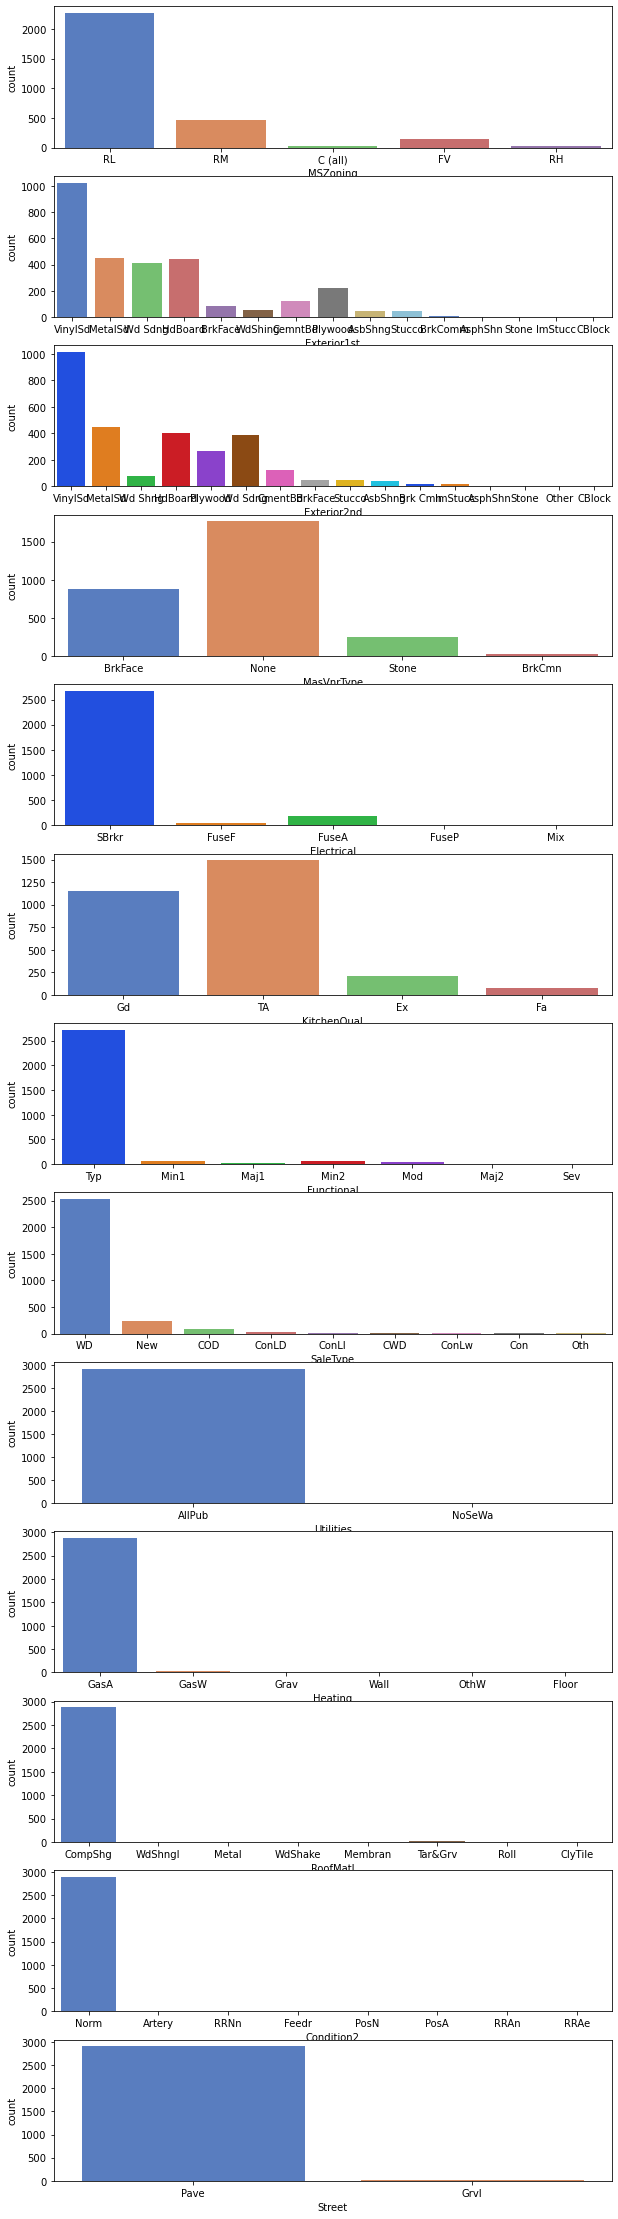

In [16]:
#Plotting the categorical columns 

fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13) = plt.subplots(13,1,figsize=(10,40))

sns.countplot(x='MSZoning', ax=ax1, palette='muted', data=house_data)
sns.countplot(x='Exterior1st', ax=ax2, palette='muted', data=house_data)
sns.countplot(house_data['Exterior2nd'], ax=ax3, palette='bright')
sns.countplot(house_data['MasVnrType'], ax=ax4, palette='muted')
sns.countplot(house_data['Electrical'], ax=ax5, palette='bright')
sns.countplot(house_data['KitchenQual'], ax=ax6, palette='muted')
sns.countplot(house_data['Functional'], ax=ax7, palette='bright')
sns.countplot(house_data['SaleType'], ax=ax8, palette='muted')
sns.countplot(house_data['Utilities'], ax=ax9, palette='muted')
sns.countplot(house_data['Heating'], ax=ax10, palette='muted')
sns.countplot(house_data['RoofMatl'], ax=ax11, palette='muted')
sns.countplot(house_data['Condition2'], ax=ax12, palette='muted')
sns.countplot(house_data['Street'], ax=ax13, palette='muted')

plt.show()

In [17]:
# dropping the columns which are not required

house_data.drop(['Id','Heating','RoofMatl','Condition2','Street','Utilities'], axis=1, inplace=True)

In [18]:
#Create new features

#'Total Square' feet by TotalBsmtSF, 1stFlrSF, 2ndFlrSF
house_data['TotalSF'] = house_data['TotalBsmtSF'] + house_data['1stFlrSF'] + house_data['2ndFlrSF']

#'Additional area' by 'GarageArea' and 'PoolArea'
house_data['AdditionalArea'] = house_data['GarageArea'] + house_data['PoolArea']

#'Total_Bathroom' by 'BsmtFullBath','BsmtHalfBath', 'FullBath', and 'HalfBath'
house_data['TotalBathroom'] = house_data['BsmtFullBath'] + house_data['BsmtHalfBath'] + house_data['FullBath'] + house_data['HalfBath']

#'Total_Porch' by 'OpenPorchSF','EnclosedPorch', '3SsnPorch', and 'ScreenPorch'
house_data['TotalPorchSF'] = house_data['OpenPorchSF'] + house_data['EnclosedPorch'] + house_data['3SsnPorch'] + house_data['ScreenPorch'] + house_data['WoodDeckSF']


In [19]:
#Create new features house age and checking negative values

house_data['HouseAge'] = (house_data['YrSold'] - house_data['YearBuilt'])

house_data[house_data['HouseAge'] == -1]

house_data.loc[ house_data['HouseAge'] == -1,'YrSold' ] = 2009

In [20]:
#Correcting the negative values house age

house_data['HouseAge'] = (house_data['YrSold'] - house_data['YearBuilt'])

house_data['HouseAge'].describe()


count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: HouseAge, dtype: float64

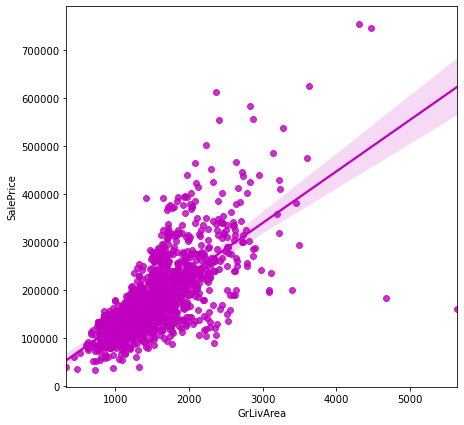

In [21]:
# Plotting the grivarea with salesprice

plt.figure(figsize=(7,7))
sns.regplot(house_data['GrLivArea'],house_data['SalePrice'],color='m')

In [22]:
#Removing the outliers

house_data[(house_data['GrLivArea']>5000) & (house_data['SalePrice']<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,YrSold,SaleType,SaleCondition,SalePrice,train,TotalSF,AdditionalArea,TotalBathroom,TotalPorchSF,HouseAge
1298,60,RL,313,63887,IR3,Bnk,Corner,Gtl,Edwards,Feedr,...,2008,New,Partial,160000.0,1,11752.0,1898.0,5.0,506,0


In [23]:
#Removing the outliers

#house_data = house_data.drop(house_data[(house_data['GrLivArea']>5000)& (house_data['SalePrice']<200000)].index)

house_data = house_data.drop([1298], axis=0)

In [24]:
#Checking the datatype wise counts

house_data.dtypes.value_counts()

object     34
int64      31
float64    12
dtype: int64

In [25]:
#Replacing the categorical - ordinal to integer types

binmap={'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0, 'Y':1, 'N':0, 'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, 'No':1,'Mn':2, 'Av':3
       ,'Gd':4, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

house_data[['ExterQual','ExterCond','BsmtCond','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',
            'CentralAir','LotShape','BsmtExposure','BsmtFinType1','BsmtFinType2']] = house_data[['ExterQual','ExterCond','BsmtCond','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',
            'CentralAir','LotShape','BsmtExposure','BsmtFinType1','BsmtFinType2']].replace(binmap)



paveddrive_map = {"N" : 0, "P" : 1, "Y" : 2}

house_data['PavedDrive'] = house_data['PavedDrive'].replace(paveddrive_map)

In [26]:
house_data['LotShape'].value_counts()

3    1859
2     968
1      76
0      15
Name: LotShape, dtype: int64

In [27]:
# Creating list of remaining object datatypes

lst_obj = house_data.columns[house_data.dtypes == 'object']
lst_obj

Index(['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
#rest_object_columns categorical - nominal to integers

cat_data = pd.get_dummies(house_data[lst_obj], columns=lst_obj)
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2918
Columns: 196 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(196)
memory usage: 581.3 KB


In [29]:
#Merging the data with final datasets and dropping the existing object columns

house_data_final = pd.concat([house_data,cat_data], axis=1, sort=False)
house_data_final = house_data_final.drop(columns=lst_obj, axis=1)

In [30]:
#Checking the datatypes of the columns

house_data_final.dtypes.value_counts()

uint8      196
int64       38
float64     12
dtype: int64

In [31]:
#Creating the list of only the int and float datatypes

num_lst = house_data_final.columns[(house_data_final.dtypes == 'float64') | (house_data_final.dtypes == 'int64')
                                  ]
house_num = house_data_final[num_lst]
house_num.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MiscVal,MoSold,YrSold,SalePrice,train,TotalSF,AdditionalArea,TotalBathroom,TotalPorchSF,HouseAge
0,60,65,8450,3,7,5,2003,2003,196,4,...,0,2,2008,208500.0,1,2566.0,548.0,4.0,61,5
1,20,80,9600,3,6,8,1976,1976,0,3,...,0,5,2007,181500.0,1,2524.0,460.0,3.0,298,31
2,60,68,11250,2,7,5,2001,2002,162,4,...,0,9,2008,223500.0,1,2706.0,608.0,4.0,42,7
3,70,60,9550,2,7,5,1915,1970,0,3,...,0,2,2006,140000.0,1,2473.0,642.0,2.0,307,91
4,60,84,14260,2,8,5,2000,2000,350,4,...,0,12,2008,250000.0,1,3343.0,836.0,4.0,276,8


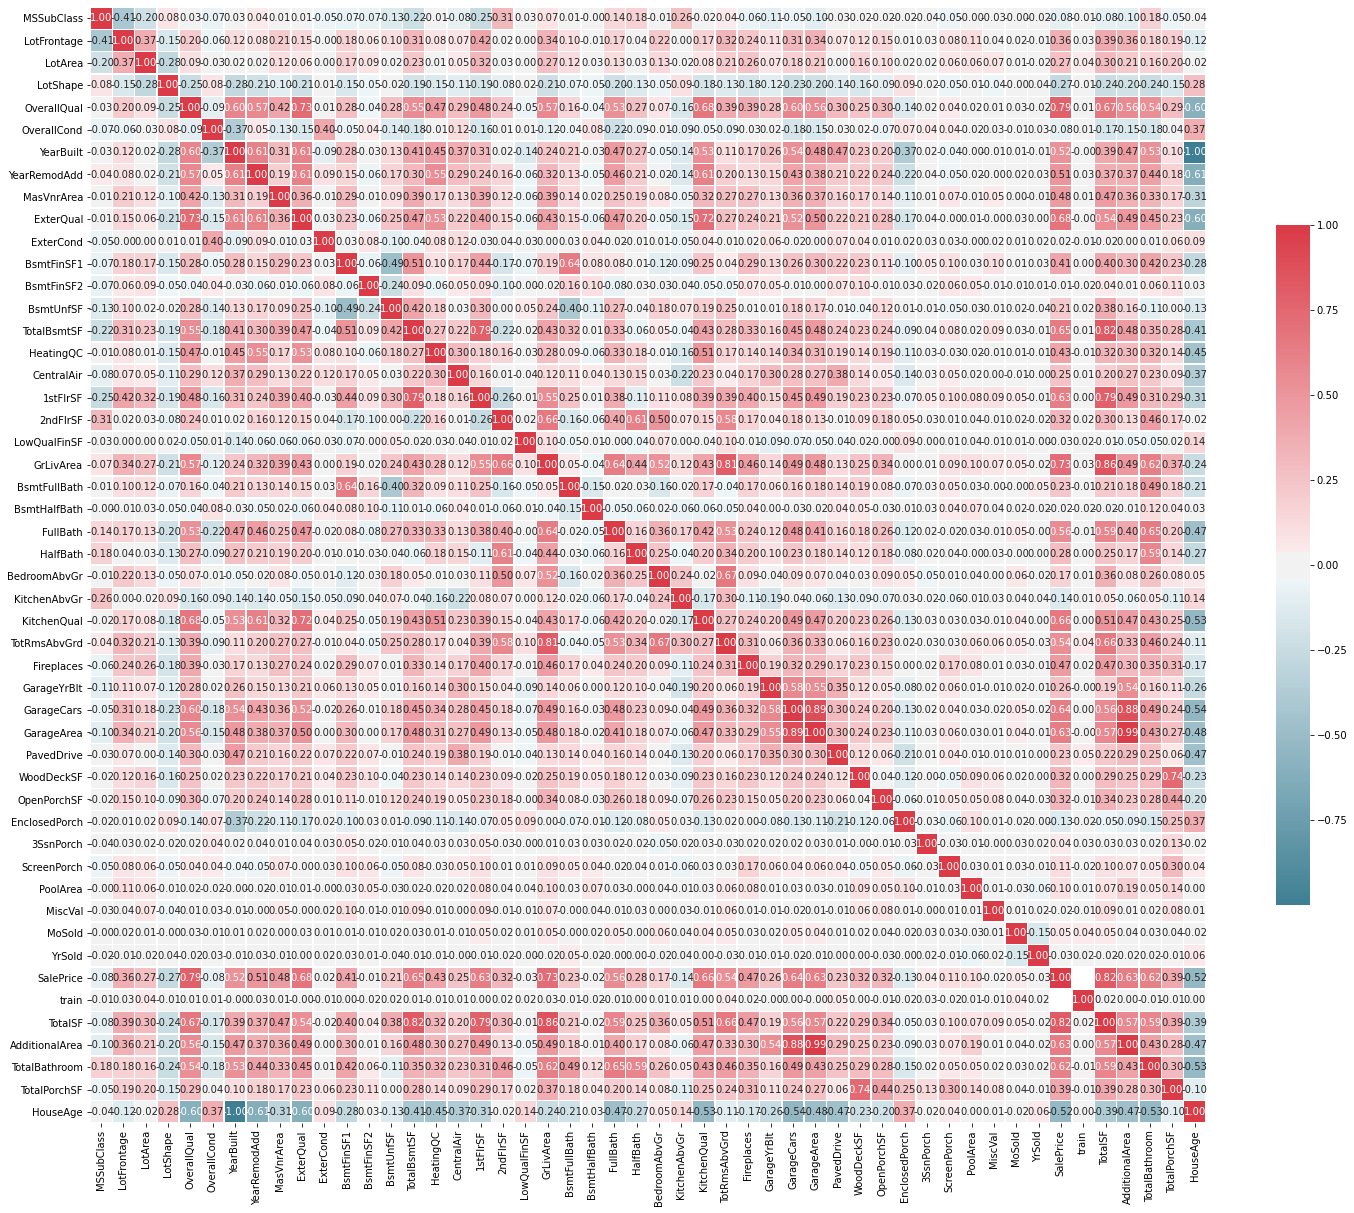

In [32]:
#Correlation Matrix

plt.figure(figsize=(25, 25))

corr = house_num.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [33]:
#Picking the most correlated columns

mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr_mask = corr.mask(mask)
#c = [c for c in corr.columns if any (corr[c] > 0.90)]

corr_values_numerical = [c for c in corr_mask.columns if any(corr_mask[c] >= 0.90)]
corr_values_numerical

['GarageArea']

In [34]:
#Dropping the highly correlated columns

house_data_final = house_data_final.drop(columns=['GarageArea'], axis=1)


In [35]:
#Checking the types of datatypes

house_data_final.dtypes.value_counts()

uint8      196
int64       38
float64     11
dtype: int64

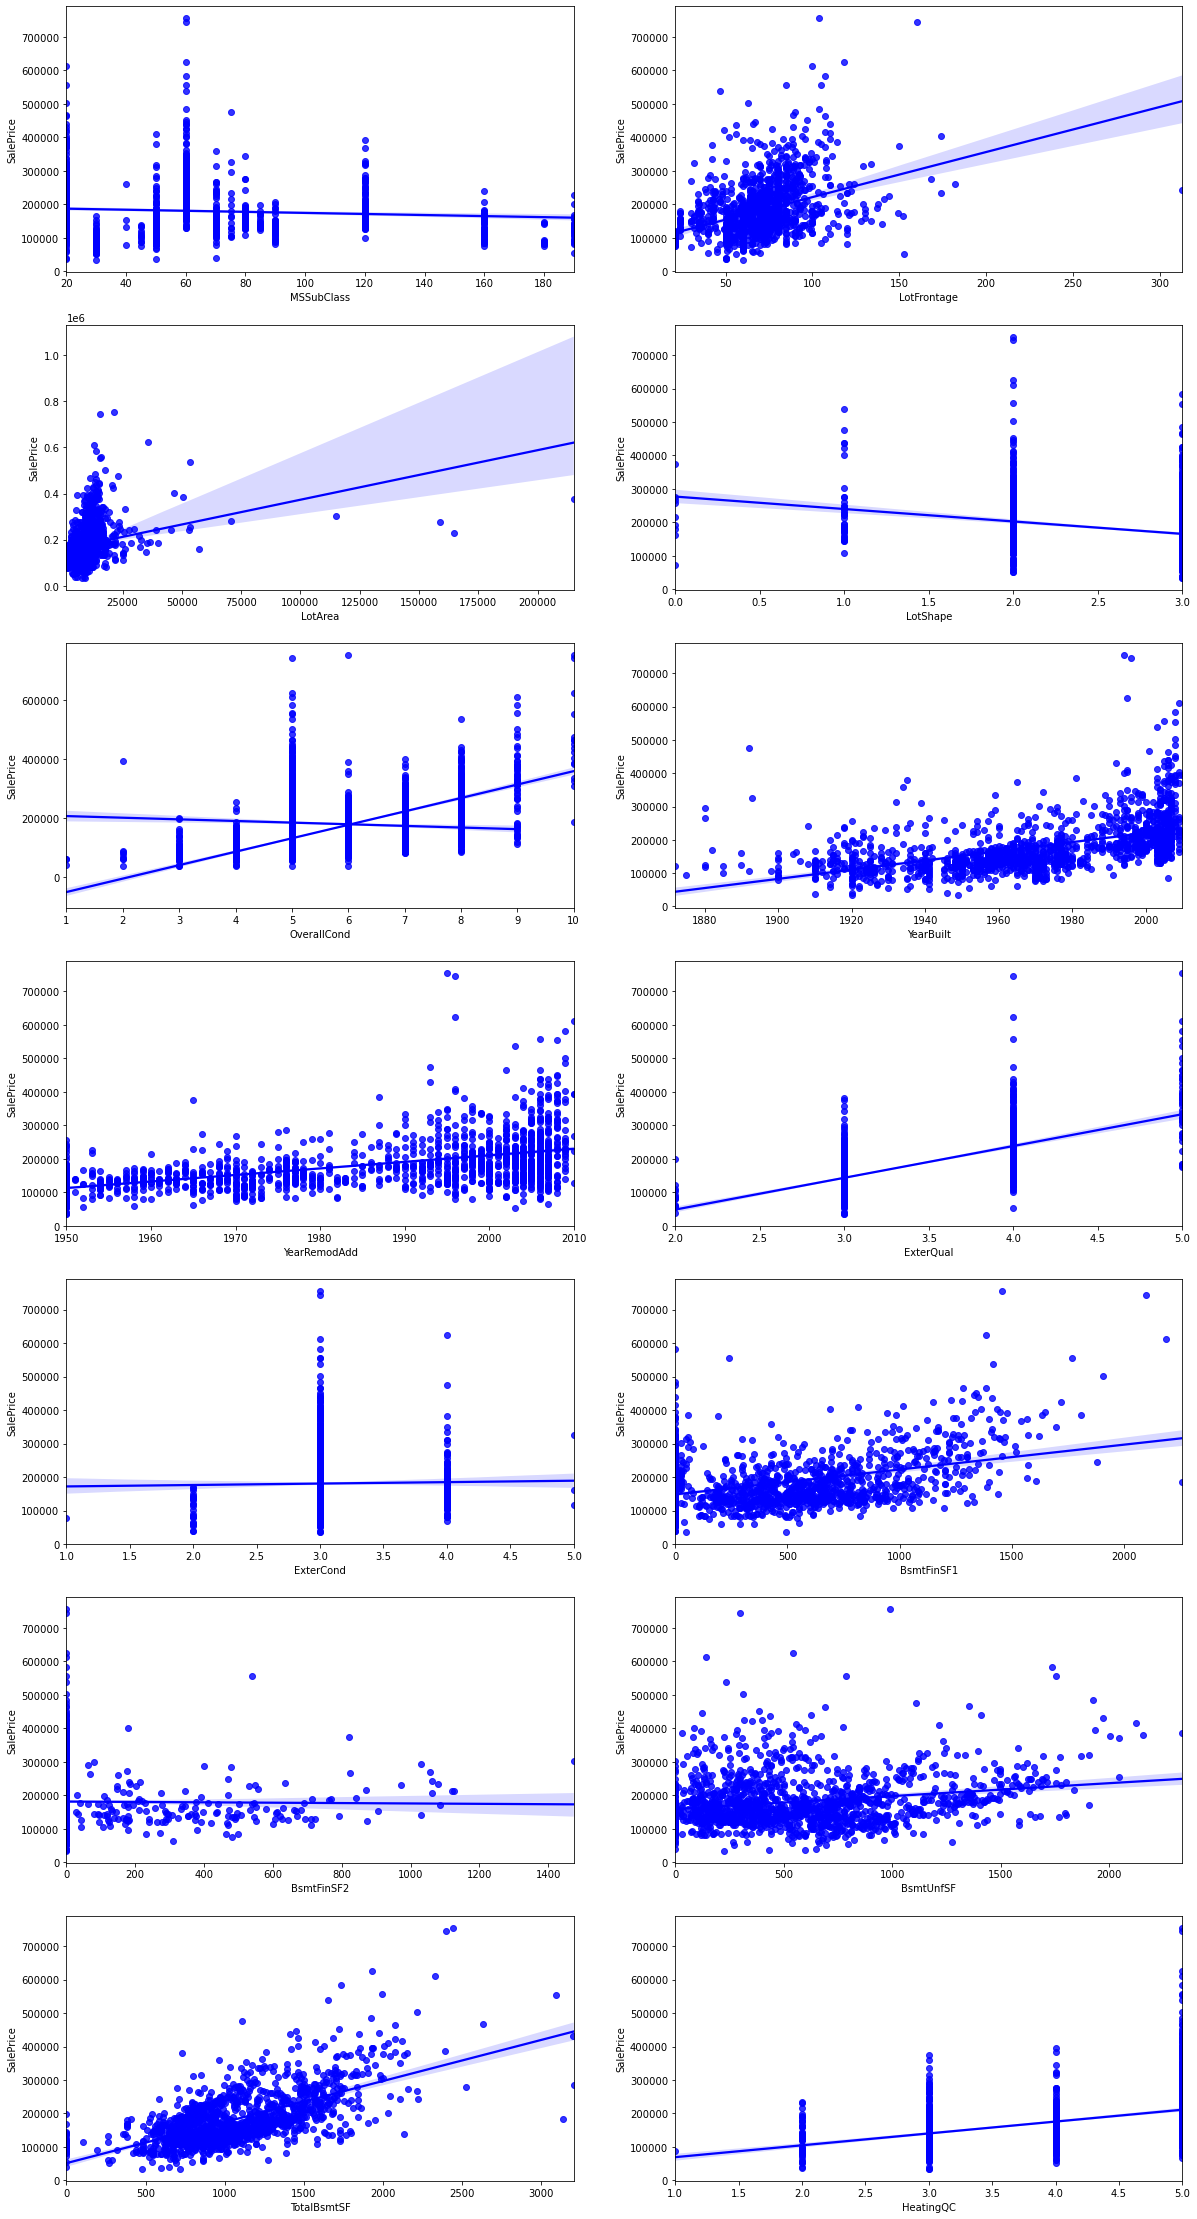

In [36]:
#Plotting the graph

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10), (ax11,ax12), (ax13,ax14)) = plt.subplots(7,2,figsize=(20,40))
sns.regplot(house_data_final['MSSubClass'],house_data_final['SalePrice'],ax=ax1, color='b')
sns.regplot(house_data_final['LotFrontage'],house_data_final['SalePrice'],ax=ax2,color='b')
sns.regplot(house_data_final['LotArea'],house_data_final['SalePrice'],ax=ax3,color='b')
sns.regplot(house_data_final['LotShape'],house_data_final['SalePrice'],ax=ax4, color='b')
sns.regplot(house_data_final['OverallQual'],house_data_final['SalePrice'],ax=ax5, color='b')
sns.regplot(house_data_final['OverallCond'],house_data_final['SalePrice'],ax=ax5, color='b')
sns.regplot(house_data_final['YearBuilt'],house_data_final['SalePrice'],ax=ax6, color='b')
sns.regplot(house_data_final['YearRemodAdd'],house_data_final['SalePrice'],ax=ax7, color='b')
sns.regplot(house_data_final['ExterQual'],house_data_final['SalePrice'],ax=ax8, color='b')
sns.regplot(house_data_final['ExterCond'],house_data_final['SalePrice'],ax=ax9,color='b')
sns.regplot(house_data_final['BsmtFinSF1'],house_data_final['SalePrice'],ax=ax10,color='b')
sns.regplot(house_data_final['BsmtFinSF2'],house_data_final['SalePrice'],ax=ax11, color='b')
sns.regplot(house_data_final['BsmtUnfSF'],house_data_final['SalePrice'],ax=ax12, color='b')
sns.regplot(house_data_final['TotalBsmtSF'],house_data_final['SalePrice'],ax=ax13, color='b')
sns.regplot(house_data_final['HeatingQC'],house_data_final['SalePrice'],ax=ax14, color='b')


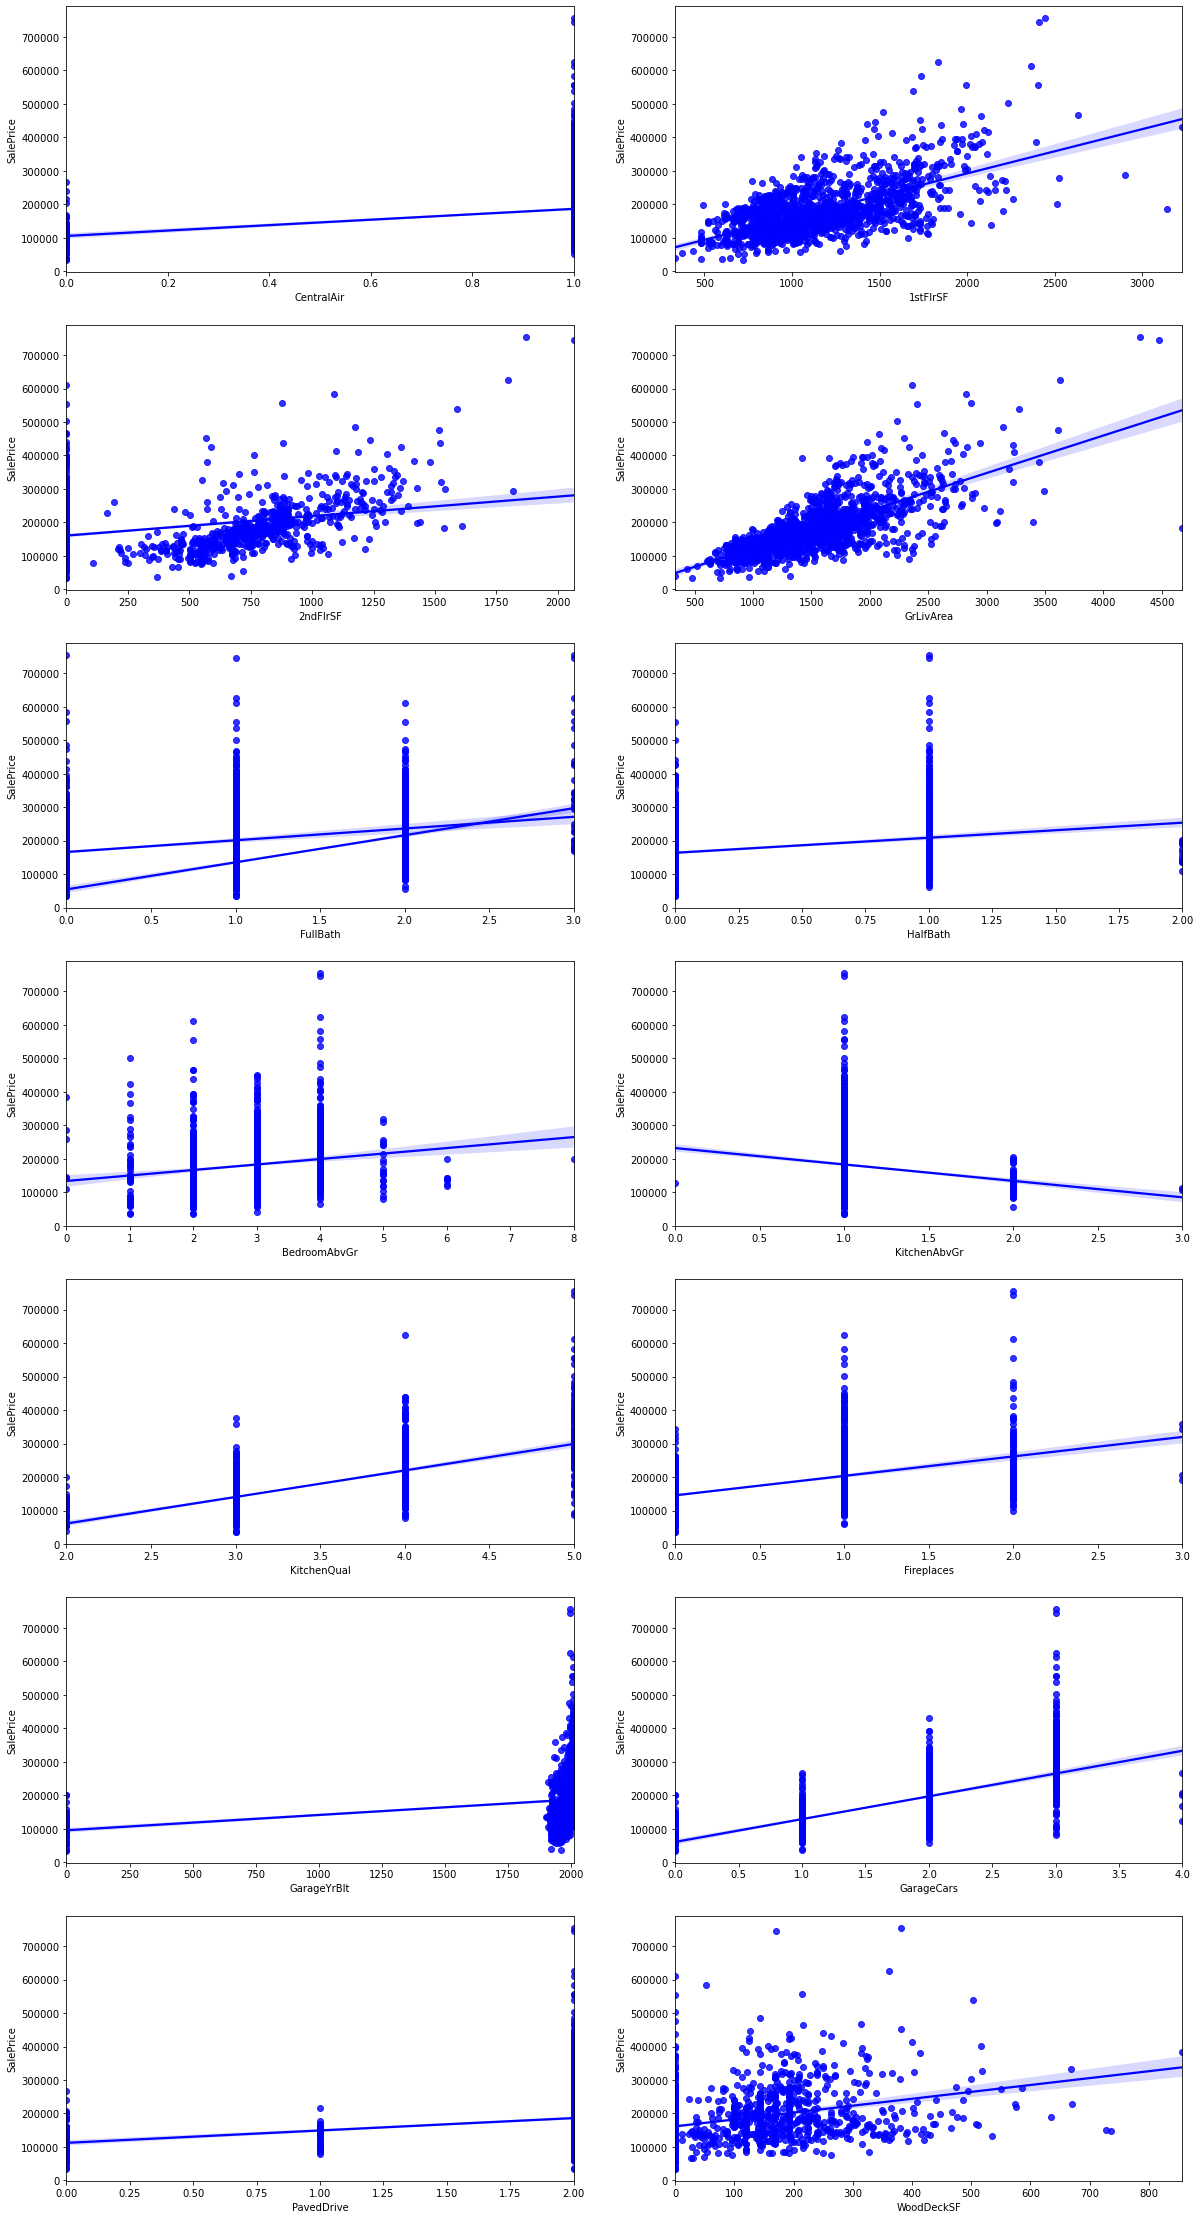

In [37]:
#Plotting the graph

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10), (ax11,ax12), (ax13,ax14)) = plt.subplots(7,2,figsize=(20,40))

sns.regplot(house_data_final['CentralAir'],house_data_final['SalePrice'],ax=ax1, color='b')
sns.regplot(house_data_final['1stFlrSF'],house_data_final['SalePrice'],ax=ax2,color='b')
sns.regplot(house_data_final['2ndFlrSF'],house_data_final['SalePrice'],ax=ax3,color='b')
sns.regplot(house_data_final['GrLivArea'],house_data_final['SalePrice'],ax=ax4, color='b')
sns.regplot(house_data_final['BsmtFullBath'],house_data_final['SalePrice'],ax=ax5, color='b')
sns.regplot(house_data_final['FullBath'],house_data_final['SalePrice'],ax=ax5, color='b')
sns.regplot(house_data_final['HalfBath'],house_data_final['SalePrice'],ax=ax6, color='b')
sns.regplot(house_data_final['BedroomAbvGr'],house_data_final['SalePrice'],ax=ax7, color='b')
sns.regplot(house_data_final['KitchenAbvGr'],house_data_final['SalePrice'],ax=ax8, color='b')
sns.regplot(house_data_final['KitchenQual'],house_data_final['SalePrice'],ax=ax9,color='b')
sns.regplot(house_data_final['Fireplaces'],house_data_final['SalePrice'],ax=ax10,color='b')
sns.regplot(house_data_final['GarageYrBlt'],house_data_final['SalePrice'],ax=ax11, color='b')
sns.regplot(house_data_final['GarageCars'],house_data_final['SalePrice'],ax=ax12, color='b')
sns.regplot(house_data_final['PavedDrive'],house_data_final['SalePrice'],ax=ax13, color='b')
sns.regplot(house_data_final['WoodDeckSF'],house_data_final['SalePrice'],ax=ax14, color='b')

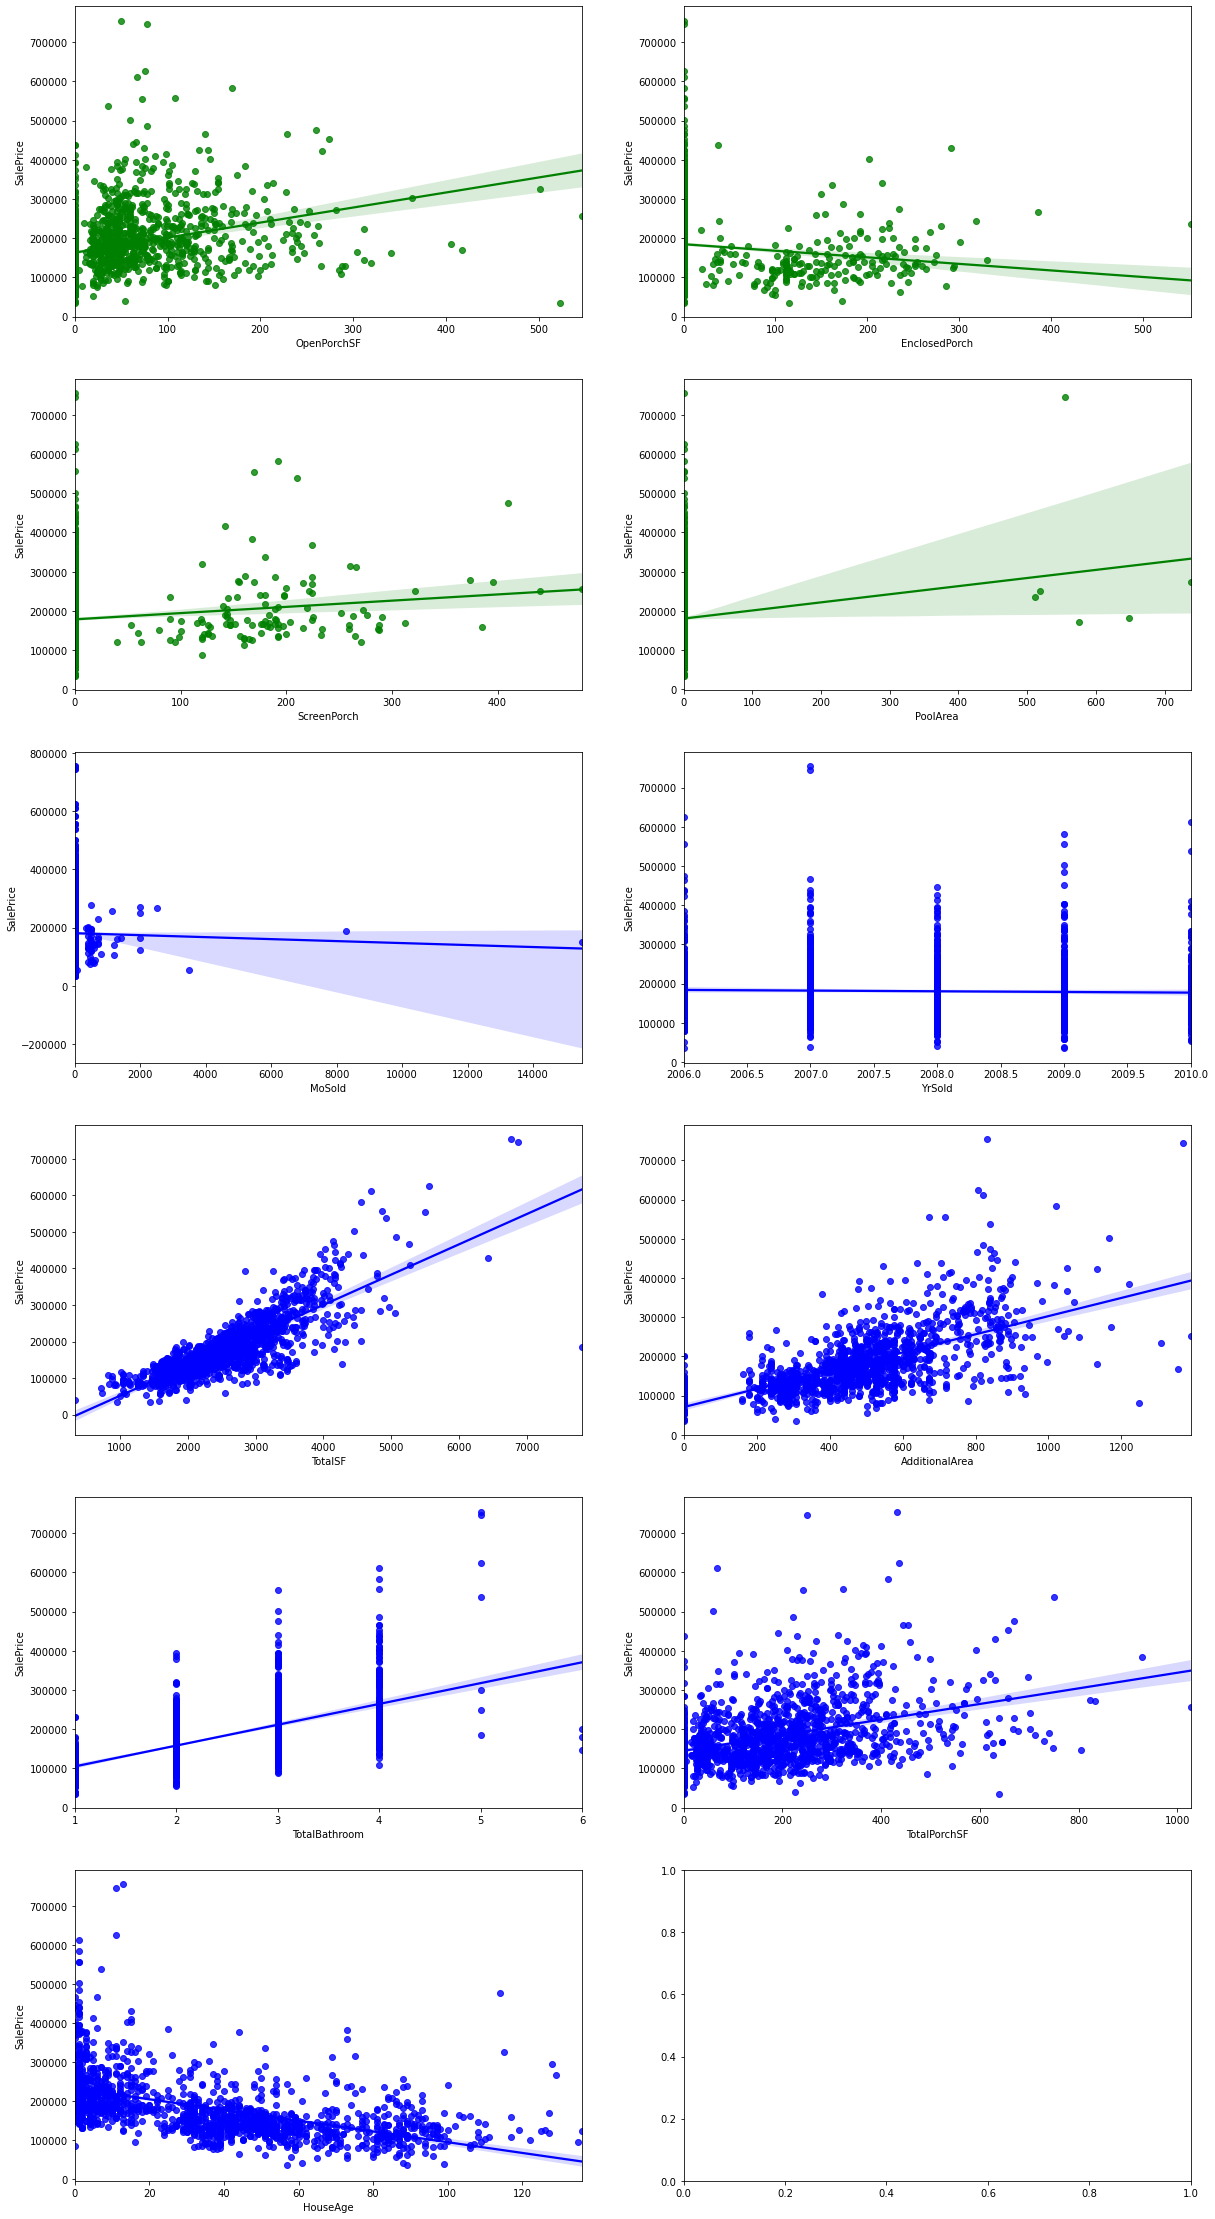

In [38]:
#Plotting the graph

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10), (ax11,ax12)) = plt.subplots(6,2,figsize=(20,40))

sns.regplot(house_data_final['OpenPorchSF'],house_data_final['SalePrice'],ax=ax1, color='g')
sns.regplot(house_data_final['EnclosedPorch'],house_data_final['SalePrice'],ax=ax2,color='g')
sns.regplot(house_data_final['ScreenPorch'],house_data_final['SalePrice'],ax=ax3,color='g')
sns.regplot(house_data_final['PoolArea'],house_data_final['SalePrice'],ax=ax4, color='g')
sns.regplot(house_data_final['MiscVal'],house_data_final['SalePrice'],ax=ax5, color='b')
sns.regplot(house_data_final['MoSold'],house_data_final['SalePrice'],ax=ax5, color='b')
sns.regplot(house_data_final['YrSold'],house_data_final['SalePrice'],ax=ax6, color='b')
sns.regplot(house_data_final['TotalSF'],house_data_final['SalePrice'],ax=ax7, color='b')
sns.regplot(house_data_final['AdditionalArea'],house_data_final['SalePrice'],ax=ax8, color='b')
sns.regplot(house_data_final['TotalBathroom'],house_data_final['SalePrice'],ax=ax9,color='b')
sns.regplot(house_data_final['TotalPorchSF'],house_data_final['SalePrice'],ax=ax10,color='b')
sns.regplot(house_data_final['HouseAge'],house_data_final['SalePrice'],ax=ax11, color='b')


In [39]:
#Checking the dataframe details

house_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2918
Columns: 245 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(38), uint8(196)
memory usage: 1.7 MB


((array([-3.49445689, -3.2502483 , -3.11517499, ...,  3.11517499,
          3.2502483 ,  3.49445689]),
  array([34900., 35311., 37900., ...,    nan,    nan,    nan])),
 (nan, nan, nan))

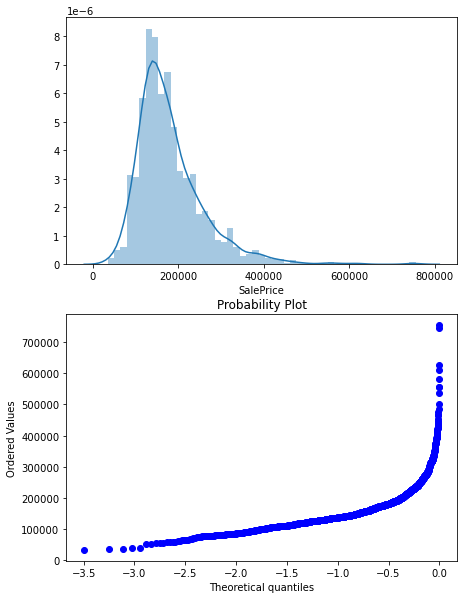

In [40]:
#check distribution of 'Sale Price'

import warnings
warnings.simplefilter("ignore")
    
fig, ax =plt.subplots(2,1, figsize=(7, 10))
sns.distplot(house_data_final['SalePrice'], ax=ax[0])
stats.probplot(house_data_final['SalePrice'], plot=plt)

In [41]:
#The above distribution graph shows that there is a right-skewed distribution on Sale Price. 
#Log transformation was used to make this feature less skewed. 
#This transformation helps to make easier interpretation and better statistical analysis. Since division by zero is a problem, 
#log+1 transformation would be better

house_data_final['SalePrice_log'] = np.log1p(house_data_final['SalePrice'])

((array([-3.49445689, -3.2502483 , -3.11517499, ...,  3.11517499,
          3.2502483 ,  3.49445689]),
  array([10.46027076, 10.47197813, 10.54273278, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

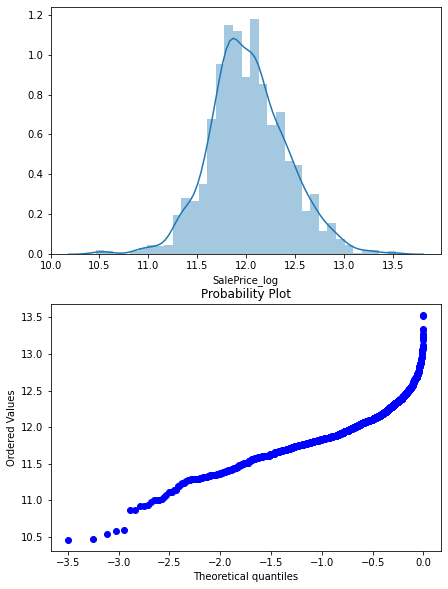

In [42]:
#Plotting the log transformed salesprice

fig, ax =plt.subplots(2,1, figsize=(7, 10))
sns.distplot(house_data_final['SalePrice_log'], ax=ax[0])
stats.probplot(house_data_final['SalePrice_log'],plot=plt)

In [43]:
#Finding skew data

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

house_numerical_data = house_data_final.drop(['train','SalePrice'], axis=1)

skew_features = house_numerical_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skewness = pd.DataFrame({'Skew' :skew_features})
high_skew

Electrical_Mix         53.990743
Exterior1st_ImStucc    53.990743
Exterior2nd_Other      53.990743
Exterior1st_CBlock     38.157577
Exterior1st_AsphShn    38.157577
                         ...    
Exterior2nd_VinylSd     0.638941
Exterior1st_VinylSd     0.621561
BsmtFullBath            0.621464
HouseAge                0.598391
OverallCond             0.569813
Length: 202, dtype: float64

In [44]:
#boxcox_normmax = Compute optimal Box-Cox transform parameter for input data.

for features in high_skew.index:
    house_data_final[features]= boxcox1p(house_data_final[features],  boxcox_normmax(house_data_final[features] + 1))

In [45]:
#Checking the dataframe details

house_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2918
Columns: 246 entries, MSSubClass to SalePrice_log
dtypes: float64(207), int64(14), uint8(25)
memory usage: 5.0 MB


In [46]:
house_data_final.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_log
0,6.501059,18.076261,13.741042,3,7,3.990577,2003,2003,19.409175,1.600774,...,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0,12.247699
1,4.250343,20.591107,14.022539,3,6,5.998232,1976,1976,0.000000,1.379863,...,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0,12.109016
2,6.501059,18.596850,14.376829,2,7,3.990577,2001,2002,17.747850,1.600774,...,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0,12.317171
3,6.864065,17.186198,14.010957,2,7,3.990577,1915,1970,0.000000,1.379863,...,0.0,0.0,1,2109.159121,0.0,0.0,0.0,0,0.0,11.849405
4,6.501059,21.228061,14.915637,2,8,3.990577,2000,2000,25.368551,1.600774,...,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0,12.429220


In [47]:
house_data_final.shape

(2918, 246)

In [48]:
#Splitting the final into test and train

train = house_data_final[house_data_final['train'] == 1]
test = house_data_final[house_data_final['train'] == 0]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 246 entries, MSSubClass to SalePrice_log
dtypes: float64(207), int64(14), uint8(25)
memory usage: 2.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1460 to 2918
Columns: 246 entries, MSSubClass to SalePrice_log
dtypes: float64(207), int64(14), uint8(25)
memory usage: 2.5 MB


In [53]:
#Checking the rows and columns

train.shape, test.shape

((1459, 246), (1459, 246))

In [ ]:
# Dropping the columns in test and train

test = test.drop(columns=['train','SalePrice','SalePrice_log'], axis=1)
train = train.drop(columns=['train','SalePrice'], axis=1)

test.info()
train.info()

In [ ]:
'''
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
'''

In [51]:
# Splitting the train in train_test_split

X = train.drop(columns=['SalePrice_log'])
y = train['SalePrice_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1021, 245), (1021,), (438, 245), (438,))

In [52]:
#Grid parameters to find best fit parameters

gridParams = {
     'n_estimators':[200,500, 1000], 
     'learning_rate': [0.1, 0.05, 0.01], 
     'max_depth':[4,6,8], 
     'min_samples_leaf':[10,20,30], 
     'max_features':[1.0,0.3,0.1]}

gbr_estimator = GradientBoostingRegressor()

grid_search_gbr = GridSearchCV(estimator=gbr_estimator, 
                            param_grid=gridParams,
                            scoring='neg_mean_squared_error',
                            cv=10,
                            verbose = True,
                            n_jobs=-1)

# # Lastly, finding the best parameters.

grid_search_gbr.fit(X_train, y_train)
best_parameters_gbr = grid_search_gbr.best_params_  
print(best_parameters_gbr)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 38.1min finished


{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 10, 'n_estimators': 200}


In [ ]:
#Gradient Boosting

In [985]:
#Gradient Boosting Regressor model

model_gbr= GradientBoostingRegressor(learning_rate=0.01, 
                                     max_depth=8, 
                                     max_features=0.1,
                                     min_samples_leaf=30, 
                                     n_estimators=1000)
model_gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)


print('MAE: %2f'% mean_absolute_error(y_test, y_pred_gbr))
print('MSE: %2f'% mean_squared_error(y_test, y_pred_gbr)) 
print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, y_pred_gbr)))   
print('R2 %2f' % r2_score(y_test, y_pred_gbr))

MAE: 0.080484
MSE: 0.015046
RMSE: 0.122661
R2 0.904960


In [987]:
#Passing the Test data to the model

y_pred_gbr_test = model_gbr.predict(test)
y_pred_gbr_test

array([11.72918575, 11.98275162, 12.13375593, ..., 12.00938653,
       11.74858301, 12.29058202])

In [988]:
#Transforming the log value to normal numers

sale = np.floor(np.expm1(y_pred_gbr_test))
sale

array([124141., 159970., 186046., ..., 164288., 126573., 217635.])

In [991]:
# Submission

submission = pd.DataFrame({ 'Id': test_set['Id'], 
           'SalePrice' : sale
            })

#submission['SalePrice'] = np.round(submission['SalePrice'],4)


submission.head()

,Id,SalePrice
0,1461,124141.0
1,1462,159970.0
2,1463,186046.0
3,1464,193796.0
4,1465,183274.0


In [993]:
#submitting the final test data

submission.to_csv('Submission1.csv', index=False)

In [994]:
#Linear regression model

linear = LinearRegression()

linear.fit(X_train, y_train)
y_predict_linear = linear.predict(X_test)

print('MAE: %2f'% mean_absolute_error(y_test, y_predict_linear))
print('MSE: %2f'% mean_squared_error(y_test, y_predict_linear))
print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, y_predict_linear)))   
print('R2 %2f' % r2_score(y_test, y_predict_linear))


MAE: 0.083966
MSE: 0.015320
RMSE: 0.123773
R2 0.903228
